# Logistic Regression Project - Solutions

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [4]:
ad_data=pd.DataFrame(pd.read_csv('/content/advertising.csv'))

**Check the head of ad_data**

In [5]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


**Use info and describe() on ad_data**

In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

**Create a histogram of the Age**

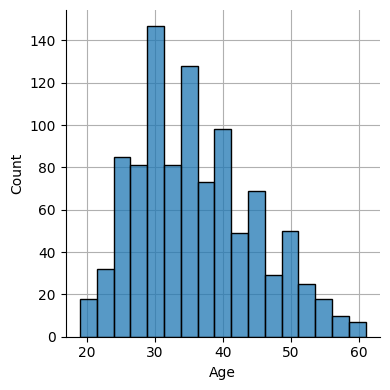

In [24]:
sns.displot(ad_data['Age'],kind='hist',height=4,zorder=2)
plt.grid()

**Create a jointplot showing Area Income versus Age.**

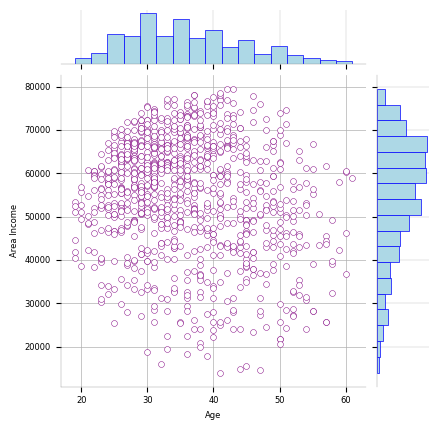

In [43]:
g=sns.jointplot(x='Age',y='Area Income',data=ad_data,color='white',s=18,edgecolor='purple',height=4.5,zorder=2)
g.ax_joint.spines['bottom'].set_color('gray')
g.ax_joint.spines['left'].set_color('gray')
g.ax_joint.spines['bottom'].set_linewidth(0.25)
g.ax_joint.spines['left'].set_linewidth(0.25)
g.ax_joint.set_xlabel('Age',fontsize=6)
g.ax_joint.set_ylabel('Area Income',fontsize=6)
g.ax_joint.tick_params(axis='x',labelsize=6,)
g.ax_joint.tick_params(axis='y',labelsize=6)
for m in g.ax_marg_x.patches:
    m.set_color('lightblue')
    m.set_zorder(2)
    m.set_edgecolor('blue')
    m.set_linewidth(0.5)
for m in g.ax_marg_y.patches:
    m.set_color('lightblue')
    m.set_zorder(2)
    m.set_edgecolor('blue')
    m.set_linewidth(0.5)
g.ax_marg_x.grid(axis="x",zorder=0,linewidth=0.25)
g.ax_marg_y.grid(axis="y",zorder=0,linewidth=0.25)
g.ax_marg_x.spines['bottom'].set_linewidth(0.25)
g.ax_marg_y.spines['left'].set_linewidth(0.25)
g.ax_marg_x.spines['bottom'].set_color('gray')
g.ax_marg_y.spines['left'].set_color('gray')
plt.grid(zorder=0,linewidth=0.5)
plt.show()

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

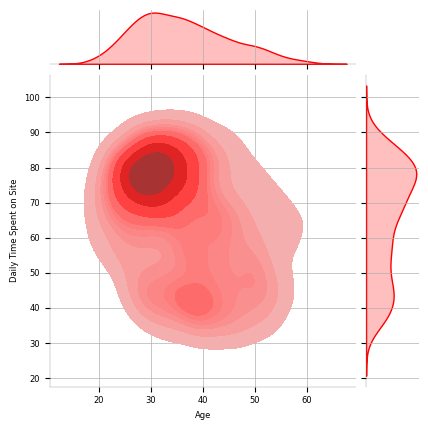

In [56]:
g=sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='red',fill=True,height=4.5,zorder=2)
g.ax_joint.spines['bottom'].set_color('gray')
g.ax_joint.spines['left'].set_color('gray')
g.ax_joint.spines['bottom'].set_linewidth(0.25)
g.ax_joint.spines['left'].set_linewidth(0.25)
g.ax_joint.set_xlabel('Age',fontsize=6)
g.ax_joint.set_ylabel('Daily Time Spent on Site',fontsize=6)
g.ax_joint.tick_params(axis='x',labelsize=6)
g.ax_joint.tick_params(axis='y',labelsize=6)
for m in g.ax_marg_x.patches:
    m.set_zorder(2)
    m.set_linewidth(0.5)
for m in g.ax_marg_y.patches:
    m.set_zorder(2)
    m.set_linewidth(0.5)
g.ax_marg_x.grid(axis="x",zorder=0,linewidth=0.5)
g.ax_marg_y.grid(axis="y",zorder=0,linewidth=0.5)
g.ax_marg_x.spines['bottom'].set_linewidth(0.25)
g.ax_marg_y.spines['left'].set_linewidth(0.25)
g.ax_marg_x.spines['bottom'].set_color('gray')
g.ax_marg_y.spines['left'].set_color('gray')
plt.grid(zorder=0,linewidth=0.5)
plt.show()

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

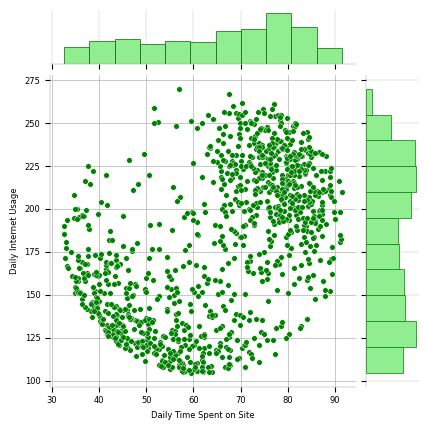

In [73]:
g=sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green',s=16,edgecolor='white',height=4.5,zorder=2)
g.ax_joint.spines['bottom'].set_color('gray')
g.ax_joint.spines['left'].set_color('gray')
g.ax_joint.spines['bottom'].set_linewidth(0.25)
g.ax_joint.spines['left'].set_linewidth(0.25)
g.ax_joint.set_xlabel('Daily Time Spent on Site',fontsize=6)
g.ax_joint.set_ylabel('Daily Internet Usage',fontsize=6)
g.ax_joint.tick_params(axis='x',labelsize=6,)
g.ax_joint.tick_params(axis='y',labelsize=6)
for m in g.ax_marg_x.patches:
    m.set_color('lightgreen')
    m.set_zorder(2)
    m.set_edgecolor('darkgreen')
    m.set_linewidth(0.5)
for m in g.ax_marg_y.patches:
    m.set_color('lightgreen')
    m.set_zorder(2)
    m.set_edgecolor('green')
    m.set_linewidth(0.5)
g.ax_marg_x.grid(axis="x",zorder=0,linewidth=0.25)
g.ax_marg_y.grid(axis="y",zorder=0,linewidth=0.25)
g.ax_marg_x.spines['bottom'].set_linewidth(0.25)
g.ax_marg_y.spines['left'].set_linewidth(0.25)
g.ax_marg_x.spines['bottom'].set_color('gray')
g.ax_marg_y.spines['left'].set_color('gray')
plt.grid(zorder=0,linewidth=0.5)
plt.show()

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

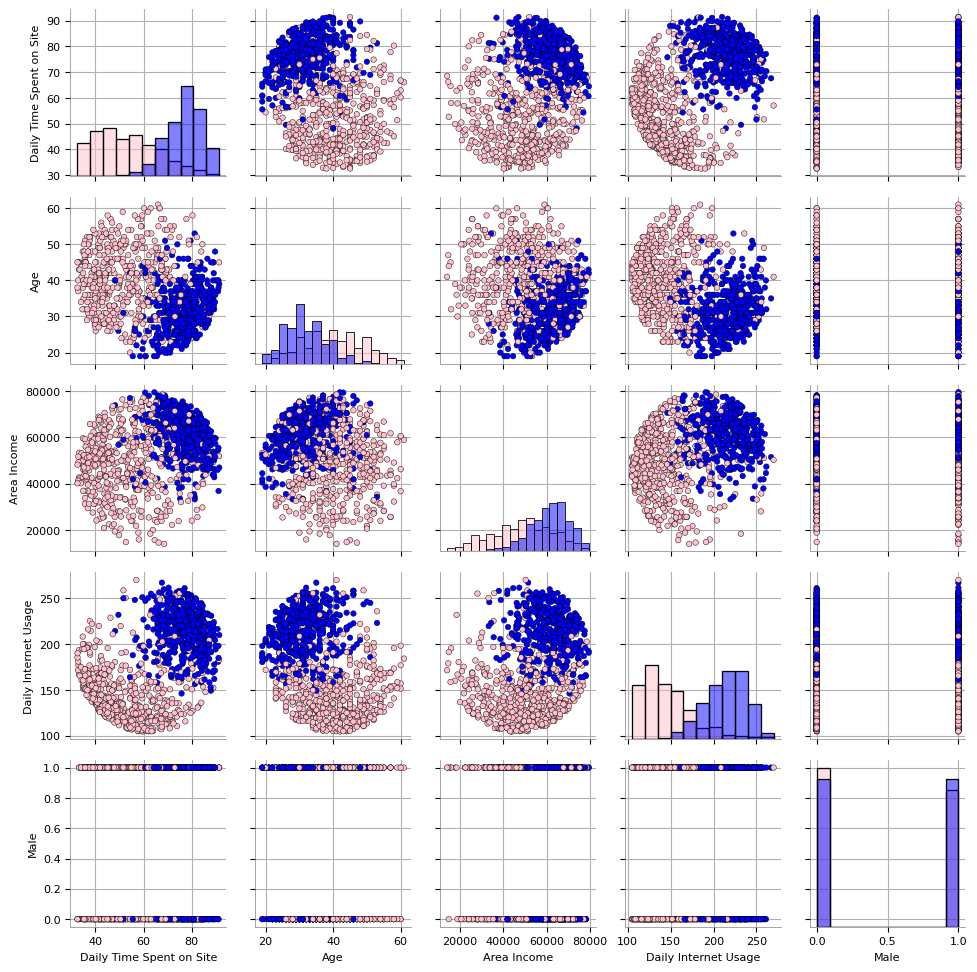

In [81]:
g=sns.PairGrid(ad_data,hue='Clicked on Ad',height=2,palette=['blue','pink'])
g.map_diag(sns.histplot,zorder=2)
g.map_offdiag(sns.scatterplot,zorder=2,s=16,edgecolor='black')
for ax in g.axes.flat:
    ax.tick_params(axis='x',labelsize=8)
    ax.tick_params(axis='y',labelsize=8)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('gray')
    ax.set_xlabel(ax.get_xlabel(),fontsize=8)
    ax.set_ylabel(ax.get_ylabel(),fontsize=8)
    ax.grid()

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [82]:
x=ad_data.iloc[:,:4]
y=ad_data['Clicked on Ad']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

**Train and fit a logistic regression model on the training set.**

In [85]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [90]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [91]:
y_pred=model.predict(x_test)

**Create a classification report for the model.**

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## Great Job!